In [67]:
# import libraries
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

In [50]:
# read in data

# training data
path_X = "data/train/X.csv"
data_set = pd.read_csv(path_X,header=0)
X_train = data_set.loc[:,'ORIG_RT':'X12' ]
X_train = pd.DataFrame.as_matrix(X_train)

path_Y = "data/train/Y.csv"
data_set = pd.read_csv(path_Y,header=0)
data_set = data_set.loc[:,'0':'5' ]
Y_train = pd.DataFrame.as_matrix(data_set)
Y_train = np.argmax(Y_train, axis=1)
Y_train = np.reshape(Y_train, [Y_train.shape[0], 1])

# test data
path_X = "data/test/X.csv"
data_set = pd.read_csv(path_X,header=0)
X_test = data_set.loc[:,'ORIG_RT':'X12' ]
X_test = pd.DataFrame.as_matrix(X_test)

path_Y = "data/test/Y.csv"
data_set = pd.read_csv(path_Y,header=0)
data_set = data_set.loc[:,'0':'5' ]
Y_test = pd.DataFrame.as_matrix(data_set)
y_test = Y_test
Y_test = np.argmax(Y_test, axis=1)
Y_test = np.reshape(Y_test, [Y_test.shape[0], 1])

c:\users\kponomareva\appdata\local\continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
c:\users\kponomareva\appdata\local\continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':
c:\users\kponomareva\appdata\local\continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
c:\users\kponomareva\appdata\local\continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [52]:
# K-means initialization
assign_cluster = Y_train
num_clusters = 6

# define centroids for each cluster based on the train data
new_c_list = []
for i in range(num_clusters):
    new_c_list.append(X_train[np.where(assign_cluster == i)[0]].mean(axis=0))

centroids_init = np.stack(new_c_list)

    
    
    



In [53]:
# K-means algorithm
def kmean(X, mu_c, num_clusters=6):
    error = 10000
    while error > 0.2:
        distance_list = []
        for c in mu_c:
            dist = np.sqrt(np.sum((X - c) ** 2, axis=1))
            distance_list.append(dist)
        assign_cluster = np.stack(distance_list).argmin(axis=0)
  
        # find new centroids
        new_c_list = []
        for i in range(num_clusters):
            new_c_list.append(X[np.where(assign_cluster == i)[0]].mean(axis=0))
 
        new_c = np.stack(new_c_list)
        error = np.sum(np.abs(new_c - mu_c))
        mu_c = new_c

    return mu_c, assign_cluster

In [54]:
# run K-means on the test data
mu_c, assign_cluster = kmean(X_test, centroids_init, num_clusters)

In [55]:
# compute metrics
pred = np.reshape(assign_cluster, Y_test.shape)

class_0_TP = np.sum(np.logical_and(pred==0, Y_test==0))
class_0_FP = np.sum(np.logical_and(pred==0, Y_test!=0))
class_0_TN = np.sum(np.logical_and(pred!=0, Y_test!=0))
class_0_FN = np.sum(np.logical_and(pred!=0, Y_test==0))

class_1_TP = np.sum(np.logical_and(pred==1, Y_test==1))
class_1_FP = np.sum(np.logical_and(pred==1, Y_test!=1))
class_1_TN = np.sum(np.logical_and(pred!=1, Y_test!=1))
class_1_FN = np.sum(np.logical_and(pred!=1, Y_test==1))

class_2_TP = np.sum(np.logical_and(pred==2, Y_test==2))
class_2_FP = np.sum(np.logical_and(pred==2, Y_test!=2))
class_2_TN = np.sum(np.logical_and(pred!=2, Y_test!=2))
class_2_FN = np.sum(np.logical_and(pred!=2, Y_test==2))

class_3_TP = np.sum(np.logical_and(pred==3, Y_test==3))
class_3_FP = np.sum(np.logical_and(pred==3, Y_test!=3))
class_3_TN = np.sum(np.logical_and(pred!=3, Y_test!=3))
class_3_FN = np.sum(np.logical_and(pred!=3, Y_test==3))

class_4_TP = np.sum(np.logical_and(pred==4, Y_test==4))
class_4_FP = np.sum(np.logical_and(pred==4, Y_test!=4))
class_4_TN = np.sum(np.logical_and(pred!=4, Y_test!=4))
class_4_FN = np.sum(np.logical_and(pred!=4, Y_test==4))

class_5_TP = np.sum(np.logical_and(pred==5, Y_test==5))
class_5_FP = np.sum(np.logical_and(pred==5, Y_test!=5))
class_5_TN = np.sum(np.logical_and(pred!=5, Y_test!=5))
class_5_FN = np.sum(np.logical_and(pred!=5, Y_test==5))

In [56]:
print(class_0_TP)
print(class_0_FP)
print(class_0_TN)
print(class_0_FN)
print(class_1_TP)
print(class_1_FP)
print(class_1_TN)
print(class_1_FN)
print(class_2_TP)
print(class_2_FP)
print(class_2_TN)
print(class_2_FN)
print(class_3_TP)
print(class_3_FP)
print(class_3_TN)
print(class_3_FN)
print(class_4_TP)
print(class_4_FP)
print(class_4_TN)
print(class_4_FN)
print(class_5_TP)
print(class_5_FP)
print(class_5_TN)
print(class_5_FN)

57411
1771
17836
190930
1426
67248
193473
5801
1083
53280
209047
4538
1300
45939
219556
1153
321
37713
227942
1972
377
79
265856
1636


In [65]:
#ROC curves
# convert predictions into one-hot-vectors
targets = pred.reshape(-1)
y_pred = np.eye(6)[targets]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_clusters):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_clusters)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(num_clusters):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= num_clusters

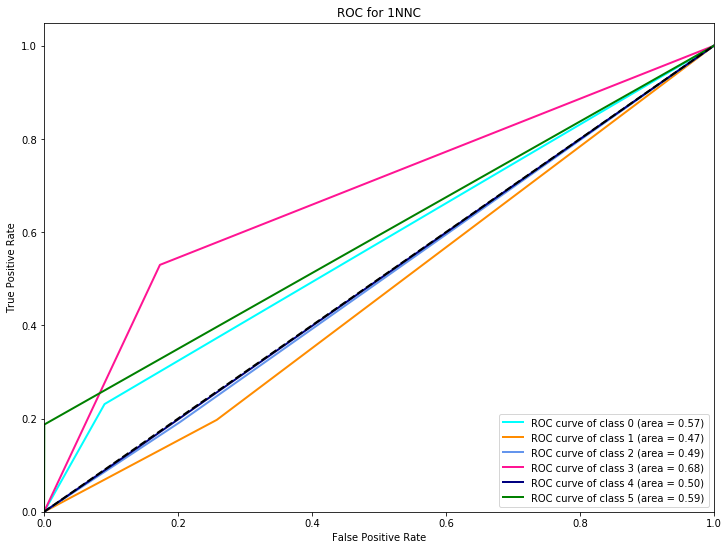

In [98]:
# Plot all ROC curves
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.figure()
lw = 2
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'deeppink', 'navy', 'green'])
for i, color in zip(range(num_clusters), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for 1NNC')
plt.legend(loc="lower right")
plt.show()